<a href="https://colab.research.google.com/github/Jeff-Delavusca/Aprendendo-Python/blob/main/aplicando_analise_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto:** Análise de Dados

Os dados utilizados referem-se aos disponíveis no kaggle, chamados de: [Brazilian E-Commerce Public Dataset by Olist](https://https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv).

#**1.** Instalação e Importação dos Pacotes

In [4]:
# importação base de dados
import kagglehub

# manipulação de base de dados
import pandas as pd

# manipulação algébrica
import numpy as np

# Bibliotecas de EDA
import missingno
!pip install summarytools #(instalar quando necessários)
from summarytools import dfSummary
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00


#**2.** Download do dataset do kaggle

In [5]:
# Download do dataset com todas as tabelas
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


#**3.** Carregar os dados após o download

In [6]:
caminho_orders = path + "/olist_orders_dataset.csv"
orders = pd.read_csv(caminho_orders)

caminho_orders_items = path + "/olist_order_items_dataset.csv"
orders_items = pd.read_csv(caminho_orders_items)

caminho_products = path + "/olist_products_dataset.csv"
products = pd.read_csv(caminho_products)

caminho_custmers = path + "/olist_customers_dataset.csv"
custmers = pd.read_csv(caminho_custmers)

caminho_reviews = path + "/olist_order_reviews_dataset.csv"
reviews = pd.read_csv(caminho_reviews)

caminho_paymentes = path +"/olist_order_payments_dataset.csv"
paymentes = pd.read_csv(caminho_paymentes)

caminho_sellers = path + "/olist_sellers_dataset.csv"
sellers = pd.read_csv(caminho_sellers)

caminho_geolocation = path + "/olist_geolocation_dataset.csv"
geolocation = pd.read_csv(caminho_geolocation)

#**4.** Fazer a junção (join) dos datasets

O objetivo dessa parte do código é fazer a junção de todas as tabelas com base em colunas índices de cada uma.

In [7]:
df1 = pd.merge(orders, orders_items, on='order_id')
df2 = pd.merge(df1, products, on='product_id')
df3 = pd.merge(df2, custmers, on='customer_id')
df4 = pd.merge(df3, reviews, on = 'order_id')
df5 = pd.merge(df4, paymentes, on = 'order_id')
df6 = pd.merge(df5, sellers, on = 'seller_id')
df = df6

In [8]:
print(f"A base possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A base possui 117329 linhas e 39 colunas.


In [9]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


In [10]:
valores_nulos = df.isnull().sum()
valores_nulos_data_frame = pd.DataFrame({'Nome da Coluna': valores_nulos.index, 'Quantidade de valores nulos': valores_nulos. values})
valores_nulos_data_frame

,Nome da Coluna,Quantidade de valores nulos
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,15
5,order_delivered_carrier_date,1235
6,order_delivered_customer_date,2471
7,order_estimated_delivery_date,0
8,order_item_id,0
9,product_id,0


<Axes: >

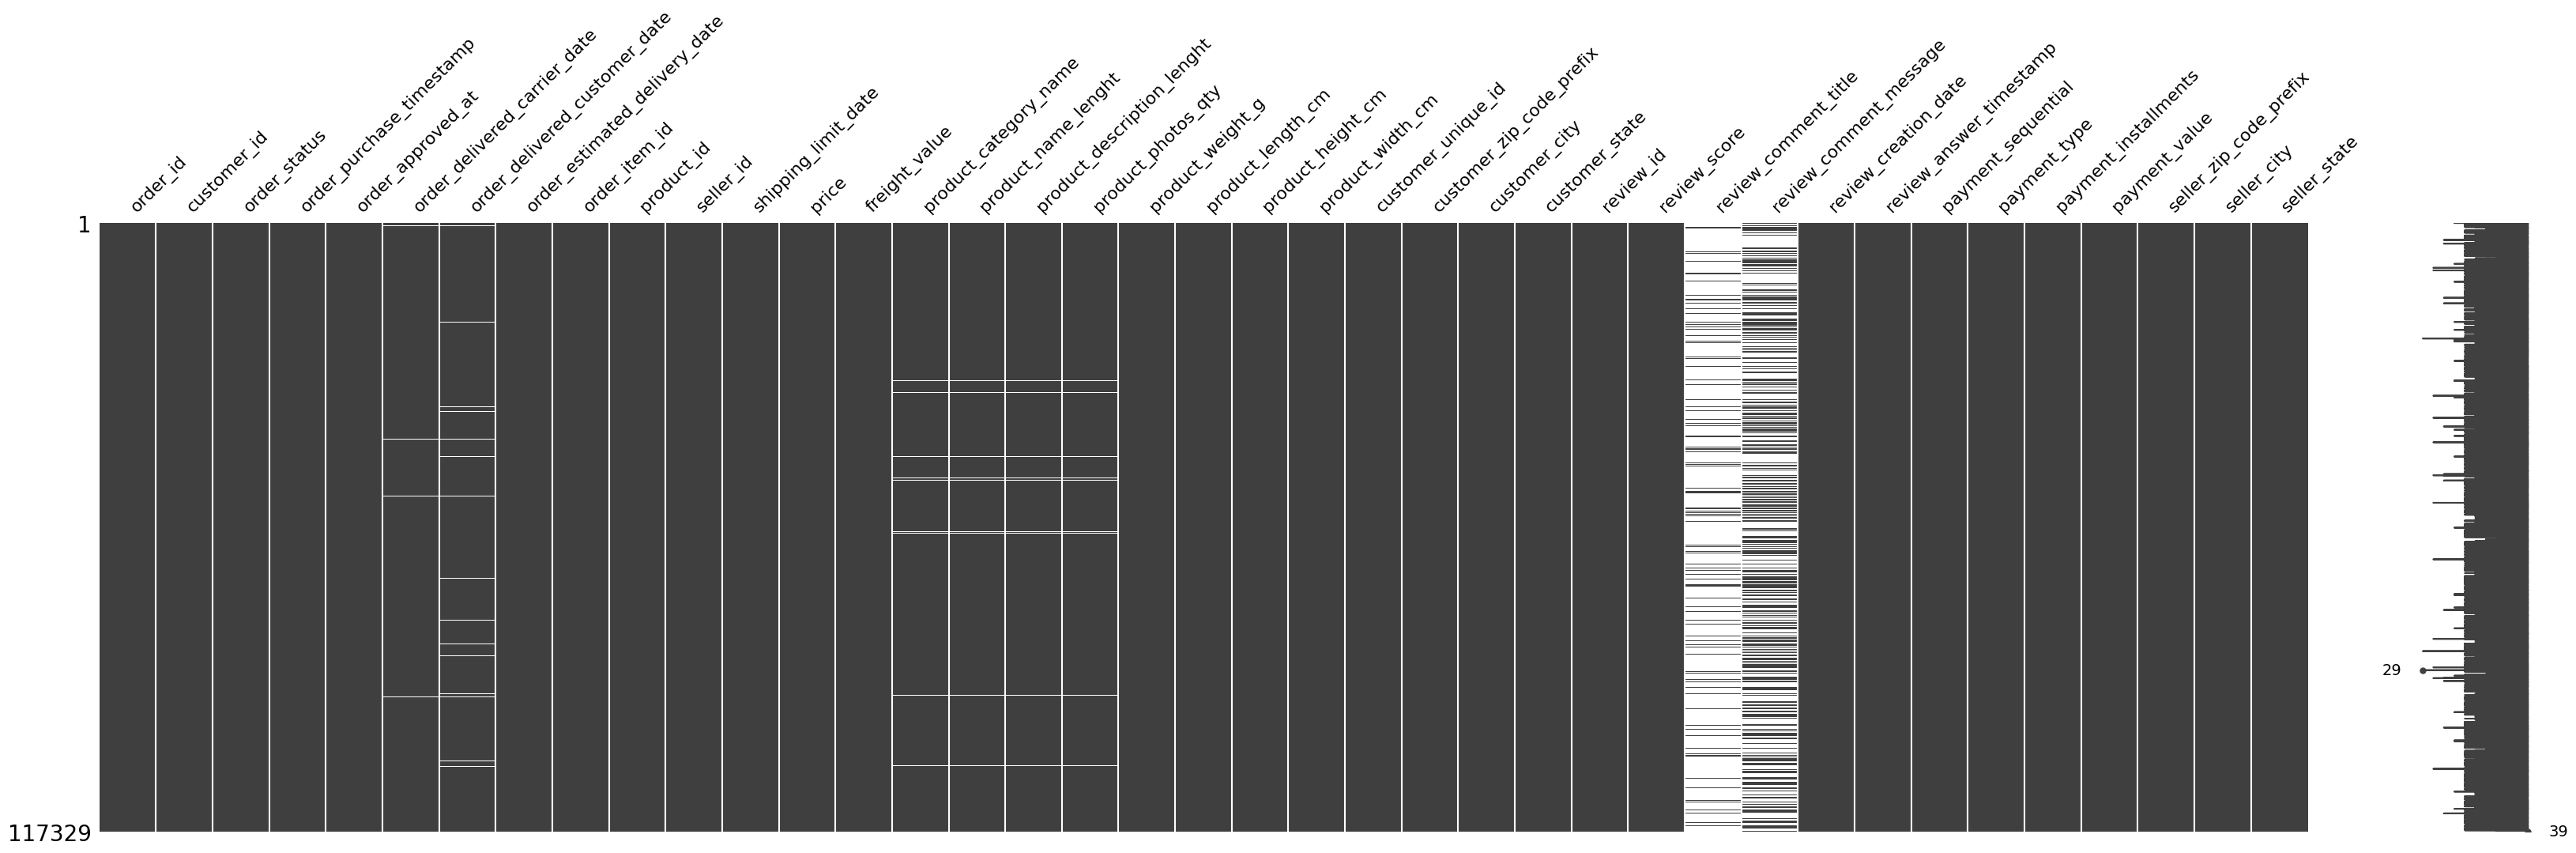

In [11]:
missingno.matrix(df, figsize=(40, 10))

In [12]:
rows, columns = df.shape

((df.isnull().sum()/rows)*100).round(2)

,0
order_id,0.00
customer_id,0.00
order_status,0.00
order_purchase_timestamp,0.00
order_approved_at,0.01
order_delivered_carrier_date,1.05
order_delivered_customer_date,2.11
order_estimated_delivery_date,0.00
order_item_id,0.00
product_id,0.00


In [13]:
df[df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state


In [14]:
contagem = pd.DataFrame(columns = ['Variavel', 'Quantidade_valores_distintos'])

for colunas in df.columns:
  dados = pd.DataFrame({'Variavel': [colunas], 'Quantidade_valores_distintos': df[colunas].value_counts().shape[0]})
  contagem = pd.concat([contagem, dados], ignore_index=True)

contagem

,Variavel,Quantidade_valores_distintos
0,order_id,97916
1,customer_id,97916
2,order_status,7
3,order_purchase_timestamp,97370
4,order_approved_at,89533
5,order_delivered_carrier_date,80449
6,order_delivered_customer_date,95021
7,order_estimated_delivery_date,449
8,order_item_id,21
9,product_id,32789


In [15]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 895ab968e7bb0d5659d16cd74cd1652. fedcd9f7ccdc8cba3a18defedd1a553. fa65dad1b0e818e3ccc5cb0e3923134. ccf804e764ed5650cd8759557269dc5. a3725dfe487d359b5be08cac48b64e6. 68986e4324f6a21481df4e6e89abcf7. 465c2e1bee4561cb39e0db8c5993aa8. c6492b842ac190db807c15aff21a7d9. 6d58638e32674bebee793a47ac4cba10. 285c2e15bebd4ac83635ccc563dc7111. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,customer_id[object],1. 270c23a11d024a44c896d1894b261a2. 13aa59158da63ba0e93ec6ac2c07aa3. 9af2372a1e49340278e7c1ef8d749f4. 92cd3ec6e2d643d4ebd0e3d6238f695. d22f25a9fadfb1abbc2e29395b12396. 86cc80fef09f7f39df4b0dbce48e817. 63b964e79dee32a3587651701a2b8d8. 6ee2f17e3b6c33d6a9557f280edd299. 2ba91e12e5e4c9f56b82b86d9031d310. b246eeed30b362c09d867b9e598bee11. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,order_status[object],1. delivered2. shipped3. canceled4. invoiced5. processing6. unavailable7. approved,"114,859 (97.9%)1,167 (1.0%)553 (0.5%)370 (0.3%)370 (0.3%)7 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8v

In [16]:
order_statuts_counts = df['order_status'].value_counts().reset_index()
order_statuts_counts.columns = ['status_pedido', 'contagem']

order_statuts_counts

,status_pedido,contagem
0,delivered,114859
1,shipped,1167
2,canceled,553
3,invoiced,370
4,processing,370
5,unavailable,7
6,approved,3


In [17]:
payments_counts = df['payment_type'].value_counts().reset_index()
payments_counts.columns = ['Tipo_pagamento', 'contagem']

payments_counts

,Tipo_pagamento,contagem
0,credit_card,86520
1,boleto,22835
2,voucher,6282
3,debit_card,1692


In [18]:
fig = px.bar(payments_counts, x='Tipo_pagamento', y='contagem', color='Tipo_pagamento', text='contagem',
             title='Pedidos por tipo de pagamento', labels={'contagem': 'Quantidade de pedido', 'Tipo_pagamento': 'Tipo de pagamento'})

fig.update_traces(textposition='outside', texttemplate='%{text}', textfont_size=12)
fig.update_layout(width=1000, height=500)
fig.show()

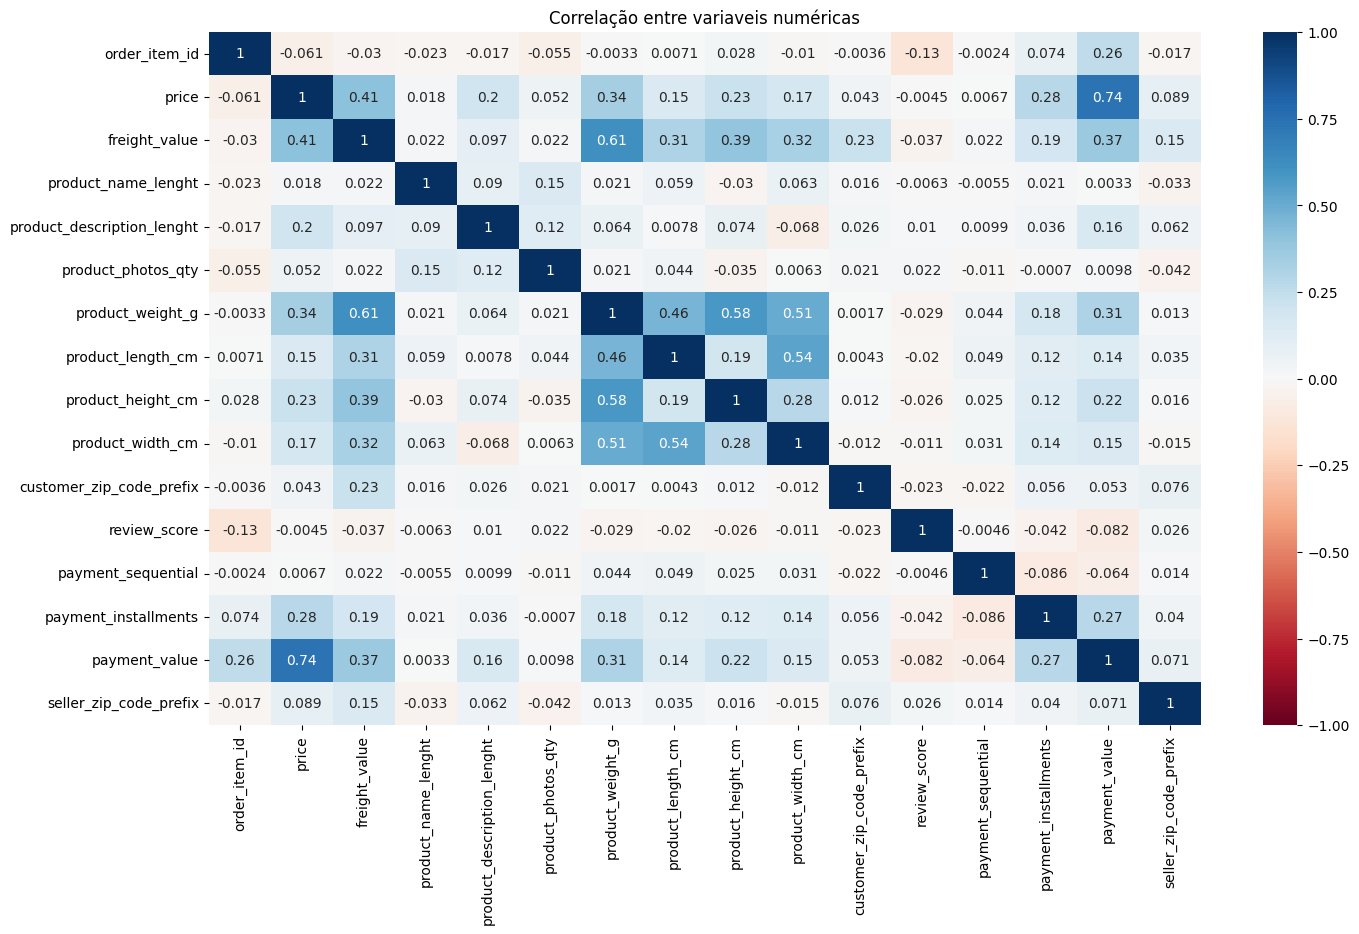

In [19]:
plt.figure(figsize=(16, 9))
plt.title('Correlação entre variaveis numéricas')

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.show()

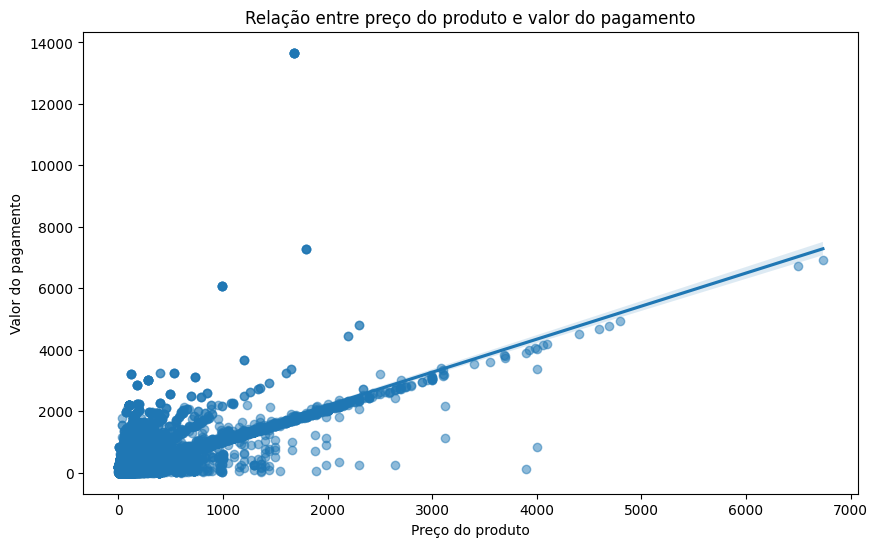

In [20]:
plt.figure(figsize=(10, 6))

sns.regplot(x='price', y= 'payment_value', data=df, scatter_kws={'alpha':0.5})

plt.title('Relação entre preço do produto e valor do pagamento')
plt.xlabel('Preço do produto')
plt.ylabel('Valor do pagamento')

plt.show()

In [21]:
df[df['payment_value'] > 10000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
15717,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
15718,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
15719,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
15720,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
15721,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
15722,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do 

([0], [Text(0, 0, '')])

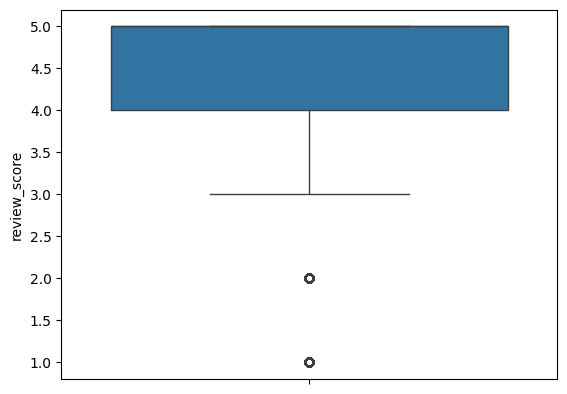

In [26]:
fig=sns.boxplot(y='review_score', data=df)
plt.xticks(rotation=90)

In [27]:
df['review_score'].describe()

,review_score
count,117329.000000
mean,4.031467
std,1.387927
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


/tmp/ipython-input-4179968230.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




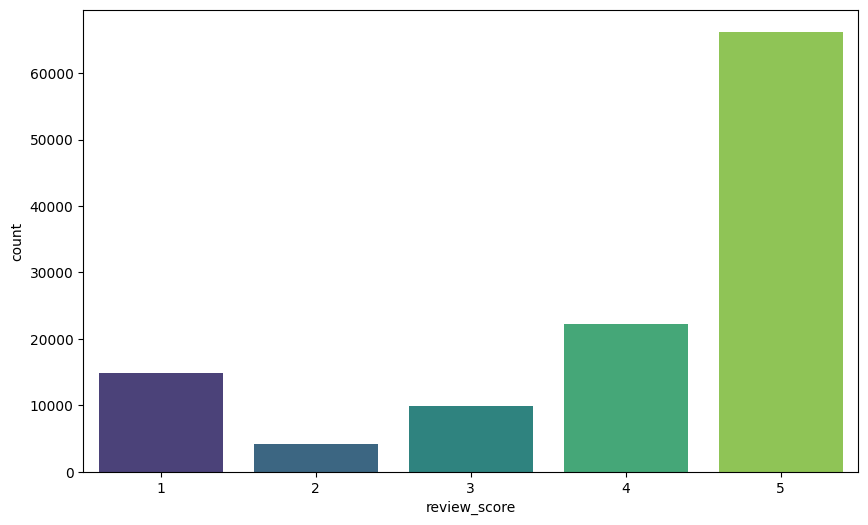

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='review_score', palette='viridis')
plt.show()

([0], [Text(0, 0, '')])

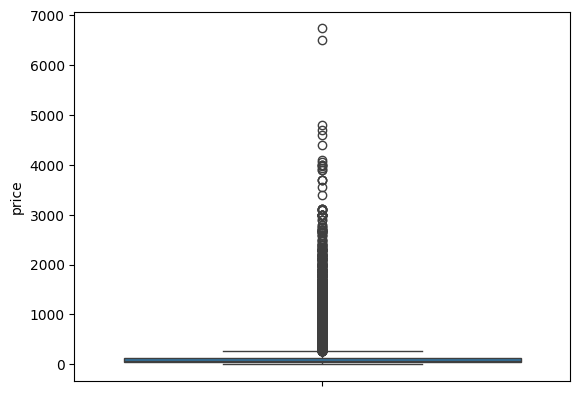

In [29]:
fig=sns.boxplot(y='price', data=df)
plt.xticks(rotation=90)

In [30]:
df['price'].describe()

,price
count,117329.000000
mean,120.524349
std,182.944843
min,0.850000
25%,39.900000
50%,74.900000
75%,134.900000
max,6735.000000


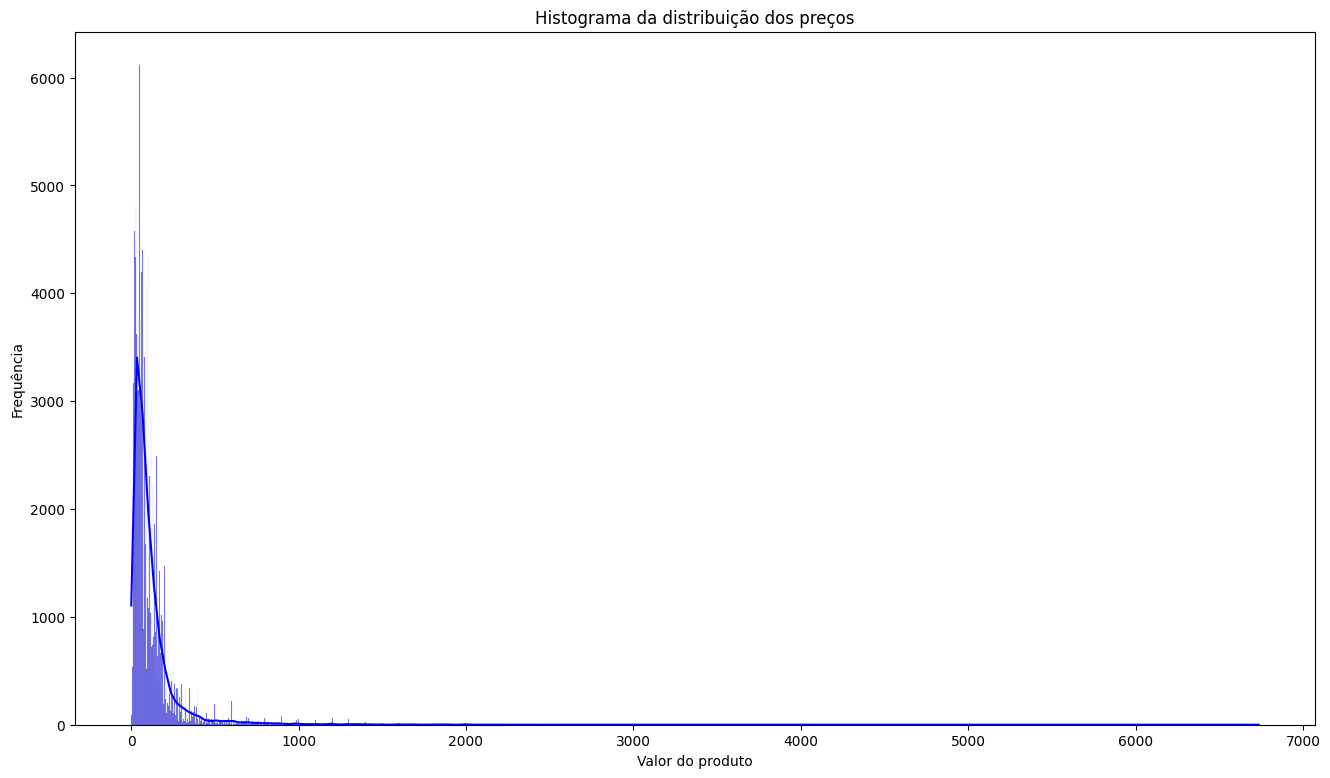

In [31]:
plt.figure(figsize=(16,9))
sns.histplot(x='price', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos preços')
plt.xlabel('Valor do produto')
plt.ylabel('Frequência')
plt.show()

([0], [Text(0, 0, '')])

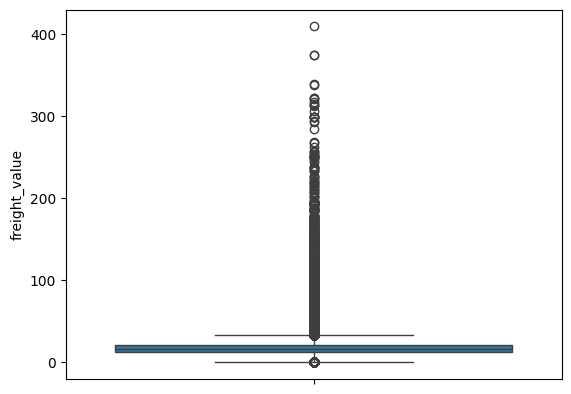

In [32]:
fig=sns.boxplot(y='freight_value', data=df)
plt.xticks(rotation=90)

In [33]:
df['freight_value'].describe()

,freight_value
count,117329.000000
mean,20.027514
std,15.828077
min,0.000000
25%,13.080000
50%,16.280000
75%,21.180000
max,409.680000


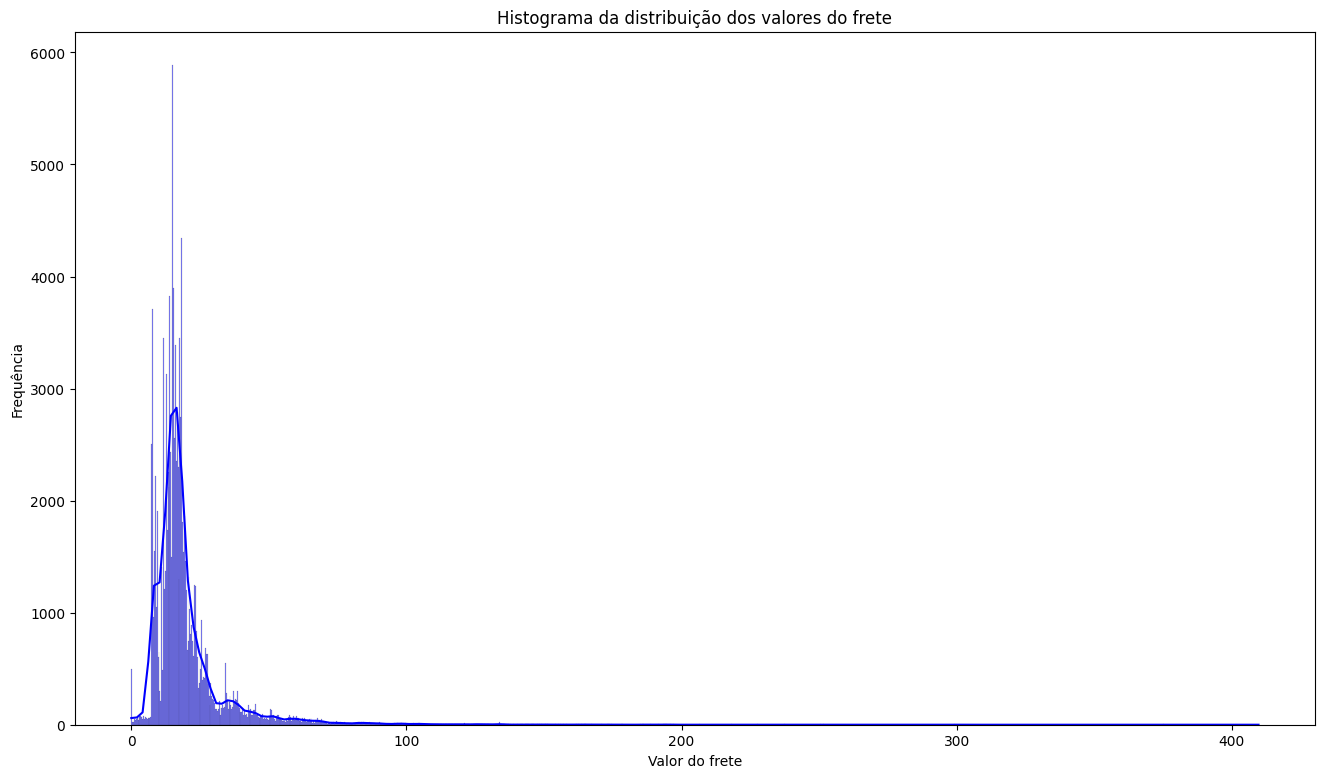

In [34]:
plt.figure(figsize=(16,9))
sns.histplot(x='freight_value', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos valores do frete')
plt.xlabel('Valor do frete')
plt.ylabel('Frequência')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'delivered'),
  Text(1, 0, 'invoiced'),
  Text(2, 0, 'shipped'),
  Text(3, 0, 'processing'),
  Text(4, 0, 'canceled'),
  Text(5, 0, 'unavailable'),
  Text(6, 0, 'approved')])

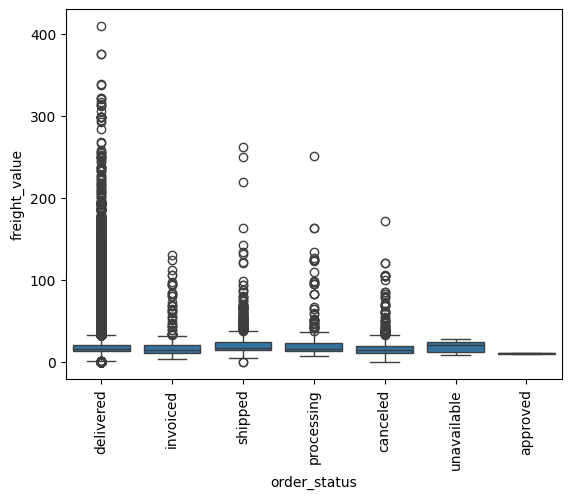

In [35]:
fig=sns.boxplot(x= 'order_status', y='freight_value', data=df)
plt.xticks(rotation=90)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [ ]:
# Criando variável do volume
df['volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

In [38]:
# Criando a variável da densidade
df['densidade'] = df['product_weight_g'] / df['volume']

In [46]:
# Criando coluna velocidade de entrega

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['velocidade_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['velocidade_entrega_estimada'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

#1hora49min